In [1]:
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.grid'] = True

import pandas as pd
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [3]:
df = pd.read_table('data.txt',sep=',')

In [4]:
df.head()

,Data,Time,Temperature_Comedor_Sensor,Temperature_Habitacion_Sensor,Weather_Temperature,CO2_Comedor_Sensor,CO2_Habitacion_Sensor,Humedad_Comedor_Sensor,Humedad_Habitacion_Sensor,Lighting_Comedor_Sensor,...,Meteo_Exterior_Sol_Oest,Meteo_Exterior_Sol_Est,Meteo_Exterior_Sol_Sud,Meteo_Exterior_Piranometro,Exterior_Entalpic_1,Exterior_Entalpic_2,Exterior_Entalpic_turbo,Temperature_Exterior_Sensor,Humedad_Exterior_Sensor,Day_Of_Week
0,13/03/2012,11:45,18.1875,17.8275,0.0,216.560,221.920,39.9125,42.4150,81.6650,...,9690.24,12604.20,95436.8,758.880,0,0,0,18.1150,48.3750,2.0
1,13/03/2012,12:00,18.4633,18.1207,6.8,219.947,220.363,39.9267,42.2453,81.7413,...,11022.00,10787.20,95436.8,762.069,0,0,0,18.4147,47.8080,2.0
2,13/03/2012,12:15,18.7673,18.4367,17.0,219.403,218.933,39.7720,42.2267,81.4240,...,13960.50,9669.63,95398.6,766.251,0,0,0,18.8533,47.4320,2.0
3,13/03/2012,12:30,19.0727,18.7513,18.0,218.613,217.045,39.7760,42.0987,81.5013,...,18511.20,9648.13,95360.3,766.037,0,0,0,19.2907,47.0240,2.0
4,13/03/2012,12:45,19.3721,19.0414,20.0,217.714,216.080,39.7757,42.0686,81.4657,...,26349.00,9208.32,95354.9,762.743,0,0,0,19.7400,45.4743,2.0


In [5]:
df.describe()

,Temperature_Comedor_Sensor,Temperature_Habitacion_Sensor,Weather_Temperature,CO2_Comedor_Sensor,CO2_Habitacion_Sensor,Humedad_Comedor_Sensor,Humedad_Habitacion_Sensor,Lighting_Comedor_Sensor,Lighting_Habitacion_Sensor,Precipitacion,...,Meteo_Exterior_Sol_Oest,Meteo_Exterior_Sol_Est,Meteo_Exterior_Sol_Sud,Meteo_Exterior_Piranometro,Exterior_Entalpic_1,Exterior_Entalpic_2,Exterior_Entalpic_turbo,Temperature_Exterior_Sensor,Humedad_Exterior_Sensor,Day_Of_Week
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,...,2764.000000,2764.000000,2764.000000,2764.000000,2764.0,2764.0,2764.0,2764.000000,2764.000000,2764.000000
mean,19.199722,18.824852,13.897396,208.479123,211.065844,44.878420,47.321220,26.745381,40.732571,0.047033,...,14936.617682,12248.000148,22047.525813,215.010017,0.0,0.0,0.0,16.757847,55.981988,3.954438
std,2.853315,2.821178,4.171991,27.032686,28.469144,6.587440,7.557795,23.298441,42.326087,0.206705,...,25964.049455,21758.550527,32709.387051,297.234046,0.0,0.0,0.0,3.885869,13.019610,1.991799
min,11.352000,11.076000,0.000000,187.339000,188.907000,27.084000,29.594700,10.740000,11.328000,0.000000,...,0.000000,0.000000,0.000000,-4.164670,0.0,0.0,0.0,9.223330,22.260700,1.000000
25%,17.450800,17.060350,10.783325,200.893250,202.682750,40.351975,42.531325,11.588700,13.265300,0.000000,...,0.000000,0.000000,0.000000,-3.381330,0.0,0.0,0.0,13.662025,46.430675,2.000000
50%,19.373650,19.021000,15.000000,207.045500,209.408000,45.434650,47.534700,11.801300,17.690000,0.000000,...,0.000000,0.000000,0.000000,3.922000,0.0,0.0,0.0,16.490350,57.477350,4.000000
75%,21.229975,20.828700,16.666700,211.245500,213.218750,49.352675,52.685975,31.224000,52.057350,0.000000,...,15088.000000,11131.275000,38736.575000,435.434500,0.0,0.0,0.0,19.397800,65.649325,6.000000
max,25.540000,24.944000,26.000000,594.389000,609.237000,60.957300,62.594700,110.693000,162.965000,1.000000,...,95278.400000,85535.400000,95704.400000,1028.270000,0.0,0.0,0.0,29.908000,83.805300,7.000000


In [6]:
y_column = "Temperature_Comedor_Sensor"
y = df[y_column]
x = df.drop(columns=[y_column, 'Data', 'Time', 'Day_Of_Week'])

In [7]:
def split(data, train_percent = 0.7):
    l = round(len(data)* train_percent)
    return data[:l], data[l:]

x_train, x_test = split(x.values)
y_train, y_test = split(y.values)

In [8]:
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

print("Коэффициенты: \n", model.coef_)

print("Квадратическая ошибка: %.2f" % mean_squared_error(y_test, predictions))

print("Коэффициент детерминации: %.2f" % r2_score(y_test, predictions))

Коэффициенты: 
 [ 9.27593085e-01  1.00699383e-02  1.07705691e-02 -1.11299715e-02
 -1.27639562e-02  2.90606195e-02  5.61704640e-03 -3.64390151e-03
 -8.98220619e-02 -2.01135832e-04 -2.08122685e-02  1.27808493e-07
  3.68767955e-06 -7.23700723e-06  2.67522389e-04 -3.64291930e-17
  0.00000000e+00  0.00000000e+00  4.02964711e-02 -1.96382887e-02]
Квадратическая ошибка: 0.07
Коэффициент детерминации: 0.99


In [9]:
def plot_learning_curve(models, param_name):
    train_score, test_score = [], []
    for k, m in models.items():
        m.fit(x_train, y_train)
        train_score.append(r2_score(y_train, m.predict(x_train)))
        test_score.append(m.score(x_test, y_test))
        
    plt.plot(list(models.keys()), train_score, label="Обучающая выборка")
    plt.plot(list(models.keys()), test_score, label="Тестовая выборка")
    plt.xlabel(param_name)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()    

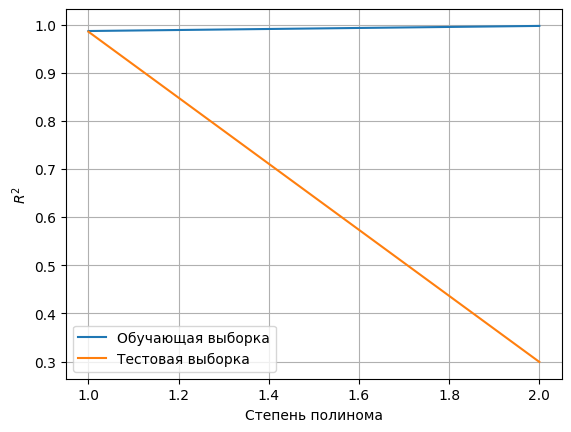

In [10]:
degrees = [1,2]

poly_models = {i: Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=20)),
    ("polynom", PolynomialFeatures(degree=i, include_bias=False)),
    ("linreg", LinearRegression()),
]) for i in degrees}

plot_learning_curve(poly_models, "Степень полинома")

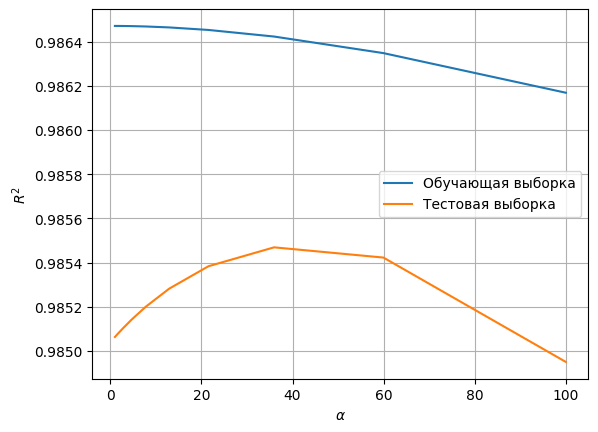

In [11]:
alphas = np.logspace(0, 2, 10)

ridge_models = {alpha: Ridge(alpha=alpha) for alpha in alphas}
plot_learning_curve(ridge_models, "$\\alpha$")